<a href="https://colab.research.google.com/github/rishi12jn/Predictive-analytics-Lab/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Telecom_customer churn.csv')
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64


In [4]:
df = df.dropna()  # Drops rows with any missing values


In [5]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty

In [6]:
outlier_dict = {}

for col in numeric_cols:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outlier_dict[col] = outliers

# Display outliers for each column
for col, outliers in outlier_dict.items():
    print(f"Outliers in column '{col}':")
    print(outliers)

Outliers in column 'rev_Mean':
         rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
14     212.515000   1971.50      84.9900   2.2275   249.500000    99.800000   
20     172.440000   1978.00      99.9900   0.0000   362.250000    72.450000   
123    159.517500   2255.75      82.9900   3.2175   666.500000    66.650000   
127    281.330000   3807.75     182.9375   8.4150   759.000000    88.500000   
178    284.932500   3794.25      75.0000   1.7325  1948.750000   194.875000   
...           ...       ...          ...      ...          ...          ...   
99537  149.220000   2032.00      97.4900   5.4450   234.500000    58.625000   
99641  321.350000   1364.50      69.5850   2.9700   630.500000   248.450000   
99717  197.945000   1118.50      50.0000   5.4450   475.000000   142.500000   
99760  188.396667   1289.00      24.8400   0.0000   653.666667   163.556667   
99872  534.930000   4719.00      10.0000   6.9300  2018.000000   515.000000   

       vceovr_Mean  

In [7]:
# Remove outliers from the DataFrame
for col in outlier_dict.keys():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])  # Replace with your numeric columns
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])  # Replace with your numeric columns
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)


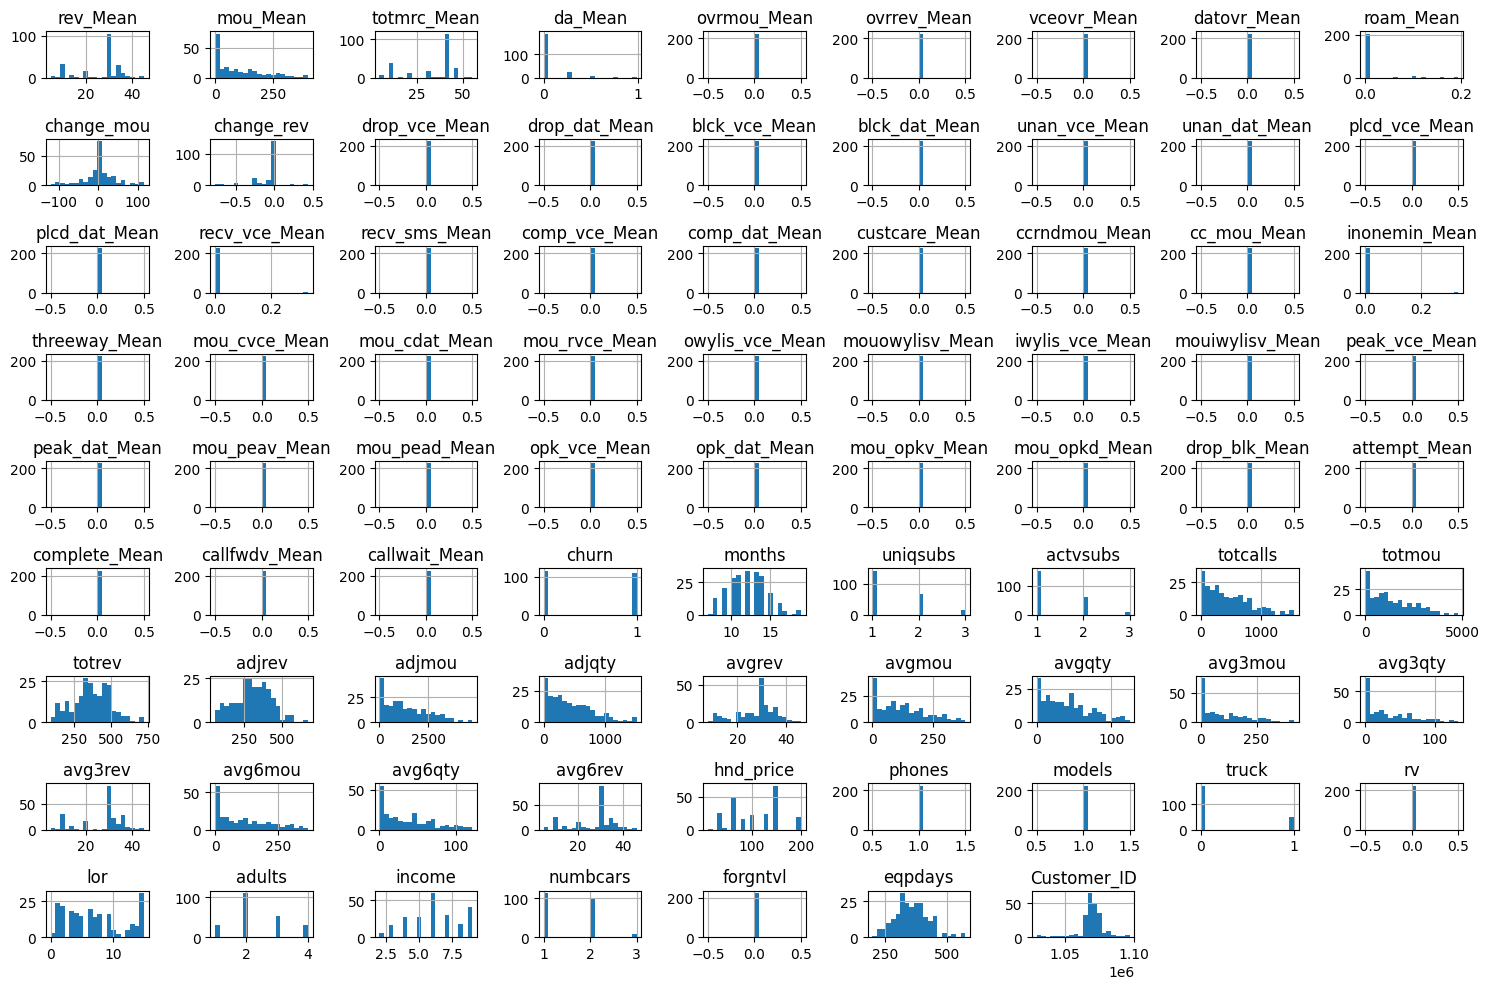

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

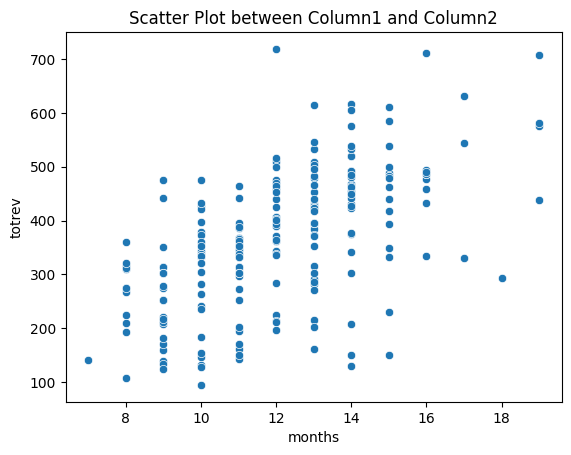

In [11]:
sns.scatterplot(x='months', y='totrev', data=df)
plt.title('Scatter Plot between Column1 and Column2')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = df.drop('churn', axis=1)  # This will drop the 'churn' column and keep all other columns as features

# Define y (target)
y = df['churn']  # The target column is 'churn'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # 'drop_first=True' avoids multicollinearity
# Define X (features) and y (target)
X = df_encoded.drop('churn', axis=1)  # Drop the target column
y = df_encoded['churn']  # Define the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 0.6212512614012258
Mean Squared Error: 0.555350618242854
Root Mean Squared Error: 0.7452185036905982
R² Score: -1.2233257651558076
